<a href="https://colab.research.google.com/github/Louie-in-yr-AREA/Project/blob/main/EIS_Simulation_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def drawZplots(Zarray, PlotTitle, plotType='Nyquist'):
    """
    This function draws either a Nyquist or a Bode plot from the impedance data
    in Zarray, based on the plotType parameter, with a title in PlotTitle.
    """

    if plotType == 'Nyquist':
        # Draw the Nyquist plot
        plt.figure()
        plt.plot(np.real(Zarray), -np.imag(Zarray), color='green')
        plt.xlabel("Re{Z} (Ohm)")
        plt.ylabel("-Im{Z} (Ohm)")
        plt.title(f"{PlotTitle} - Nyquist Plot")
        plt.show()

    elif plotType == 'Bode':
        # Draw the Bode plot
        plt.figure()
        plt.plot(Freq, np.abs(Zarray), color='blue', label='Magnitude')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Abs(Z) (Ohm)")
        plt.title(f"{PlotTitle} - Bode Plot Magnitude")

        ax = plt.gca()
        ax2 = ax.twinx()
        ax2.plot(Freq, np.rad2deg(-np.angle(Zarray)), color='red', linestyle='dotted', label='Phase')
        ax2.set_ylabel("-Phase (Z) (Degrees)")
        plt.show()

# Set up the frequency range and calculate frequency dependent quantities

Fstart = 0.1  # Lowest frequency in Hz
Fstop = 1e5  # Highest frequency in Hz
Nfreq = 1001  # Number of frequencies

Ftemp = np.linspace(np.log10(Fstart), np.log10(Fstop), Nfreq)
Freq = 10**Ftemp
w = 2 * np.pi * Freq
jw = 1j * w
'''
# Simulate and draw plots for a single resistor, capacitor, and inductor
# Specify the plot type as either 'Nyquist' or 'Bode' when calling the function

R1 = 1000
ZRes = R1 + 0*jw
drawZplots(ZRes, "Resistor", 'Nyquist')  # or 'Bode' for Bode plot

C1 = 1.0e-6
ZCap = 0 + 1/(jw*C1)
drawZplots(ZCap, "Capacitor", 'Nyquist')  # or 'Bode' for Bode plot

L1 = 2.5
ZInd = 0 + jw*L1
drawZplots(ZInd, "Inductor", 'Nyquist')  # or 'Bode' for Bode plot
'''

'\n# Simulate and draw plots for a single resistor, capacitor, and inductor\n# Specify the plot type as either \'Nyquist\' or \'Bode\' when calling the function\n\nR1 = 1000\nZRes = R1 + 0*jw\ndrawZplots(ZRes, "Resistor", \'Nyquist\')  # or \'Bode\' for Bode plot\n\nC1 = 1.0e-6\nZCap = 0 + 1/(jw*C1)\ndrawZplots(ZCap, "Capacitor", \'Nyquist\')  # or \'Bode\' for Bode plot\n\nL1 = 2.5\nZInd = 0 + jw*L1\ndrawZplots(ZInd, "Inductor", \'Nyquist\')  # or \'Bode\' for Bode plot\n'

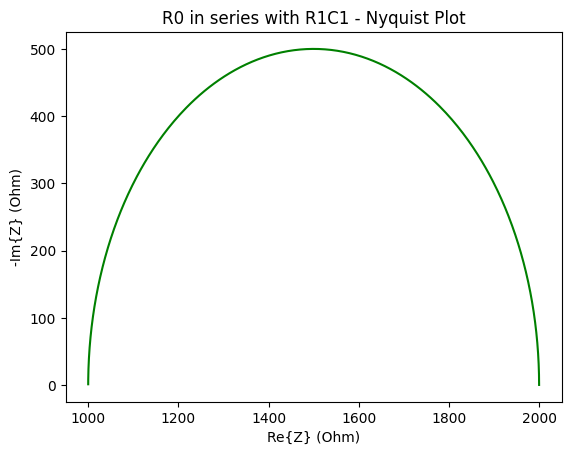

In [15]:
# Simulate a resistor R0 in series with a parallel combination of R1,C1

R0 = 1000
R1 = 1000
C1 = 1.0e-6
ZR0_R1C1 = R0 + R1/(1 + jw*R1*C1)
drawZplots(ZR0_R1C1,"R0 in series with R1C1",'Nyquist')

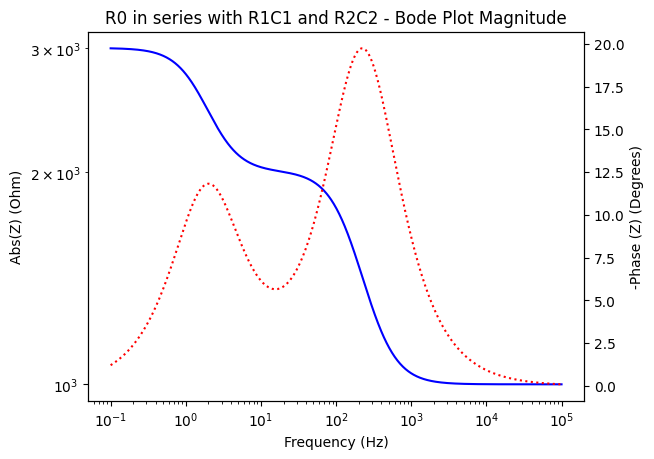

In [16]:
# Simulate a resistor R0 in series with a parallel combination of R1,C1
# followed by another parallel combination of R2,C2

R0 = 1000
R1 = 1000
R2 = 1000
C1 = 1.0e-6
C2 = 1.0e-4
ZR0_R1C1_R2C2 = R0 + R1/(1 + jw*R1*C1) + R2/(1 + jw*R2*C2)
drawZplots(ZR0_R1C1_R2C2,"R0 in series with R1C1 and R2C2",'Bode')

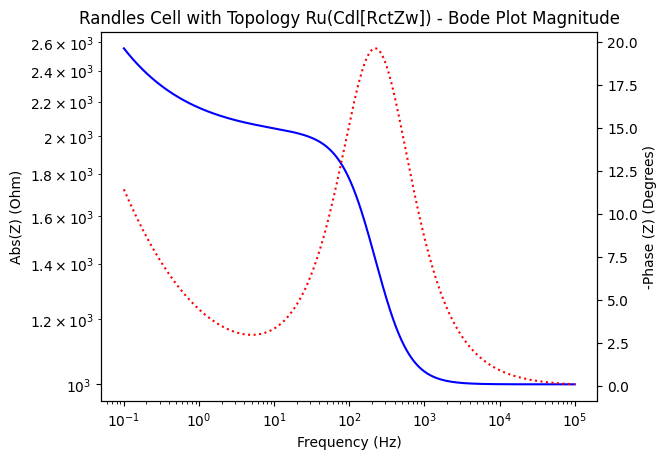

In [17]:
#simulate a circuit with cdl and w
w = 2*np.pi*Freq
sqrt_w = np.sqrt(w)
on_sqrt_w = 1/sqrt_w
jw = 1j*w
Sigma = 400
ZWar = Sigma*on_sqrt_w*(1 - 1j)
drawZplots(ZWar,'Warburg','bode')
Ru = 1000
Rct = 1000
Cdl = 1e-6
Sigma = 400
ZWar = Sigma*on_sqrt_w*(1 - 1j)
ZRctZWar = Rct + ZWar
ZCdl = 0 +  1/(jw*Cdl)
ZRand = Ru + (ZCdl*ZRctZWar)/(ZCdl + ZRctZWar)
drawZplots(ZRand,"Randles Cell with Topology Ru(Cdl[RctZw])",'Bode')

<Figure size 640x480 with 0 Axes>

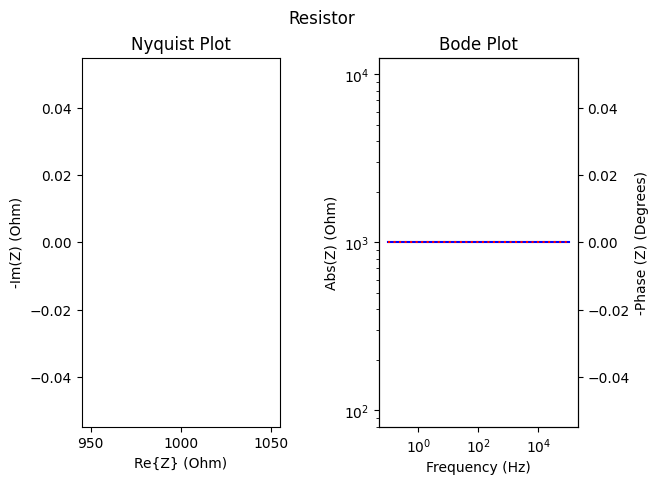

<Figure size 640x480 with 0 Axes>

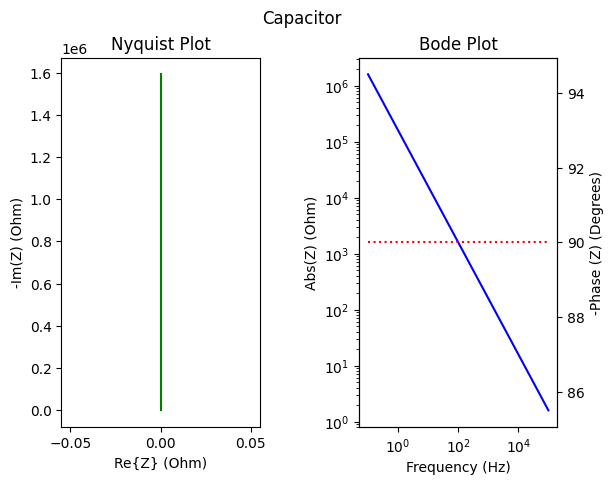

<Figure size 640x480 with 0 Axes>

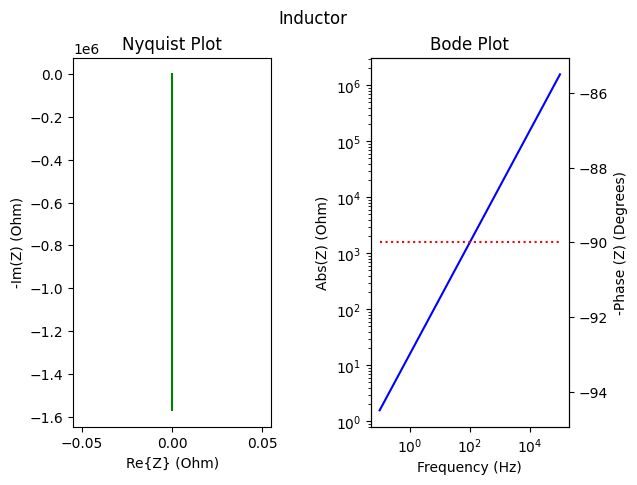

In [18]:
# This programme simulates some EIS curves for simple circuits.
# The circuits are mainly taken from "Electrochemical Impedance Sprectroscopy
# - A Tutorial" by Lazanas and Prodromodis", ACS Meas. Sci. Au 2023,3, 162-193.

import numpy as np
import matplotlib.pyplot as plt

# First define a function that will be used to draw the Nyquist and Bode
# plots.

def drawZplots(Zarray,PlotTitle):

#  Thus function draws a Nyquist and a Bode plot from the impedance data
#  in Zarray with a title in PlotTitle

   plt.figure()
   fig, (nyquist,bode) = plt.subplots(1,2)

#  Draw the Nyquist plot


   nyquist.plot(np.real(Zarray),-np.imag(Zarray),color='green')
   nyquist.set_xlabel("Re{Z} (Ohm)")
   nyquist.set_ylabel("-Im(Z) (Ohm)")
   nyquist.set_title("Nyquist Plot")

#  Draw the Bode plot magnitude

   bode.plot(Freq,np.abs(Zarray),color='blue')
   bode.set_xscale('log')
   bode.set_yscale('log')
   bode.set_xlabel("Frequency (Hz)")
   bode.set_ylabel("Abs(Z) (Ohm)")
   bode.set_title("Bode Plot")

#  Draw the Bode plot phase as a second y-axis

   bode2 = bode.twinx()
   bode2.plot(Freq,np.rad2deg(-np.angle(Zarray)),color='red',linestyle='dotted')
   bode2.set_ylabel("-Phase (Z) (Degrees)")

   plt.subplots_adjust(wspace = 0.5)
   fig.suptitle(PlotTitle)
   plt.show()

# End of function to draw the plots

# Set up a suitable frequency range for the simulations
# and claculate some frequency dependent quantities for use later

Fstart = 0.1 # Lowest frequency in Hz
Fstop =  1e5 # Highest frequency in Hz
Nfreq = 1001 # Number of frequencies

Ftemp = np.linspace(np.log10(Fstart),np.log10(Fstop),Nfreq)
Freq = 10**Ftemp
w = 2*np.pi*Freq
sqrt_w = np.sqrt(w)
on_sqrt_w = 1/sqrt_w
jw = 1j*w

# Simulate a single resistor

R1 = 1000
ZRes = R1 + 0*jw
drawZplots(ZRes,"Resistor")

# Simulate a single capacitor

C1 = 1.0e-6
ZCap = 0 +  1/(jw*C1)
drawZplots(ZCap,"Capacitor")

# Simulate a single inductor

L1 = 2.5
ZInd = 0 + jw*L1
drawZplots(ZInd,"Inductor")

<Figure size 640x480 with 0 Axes>

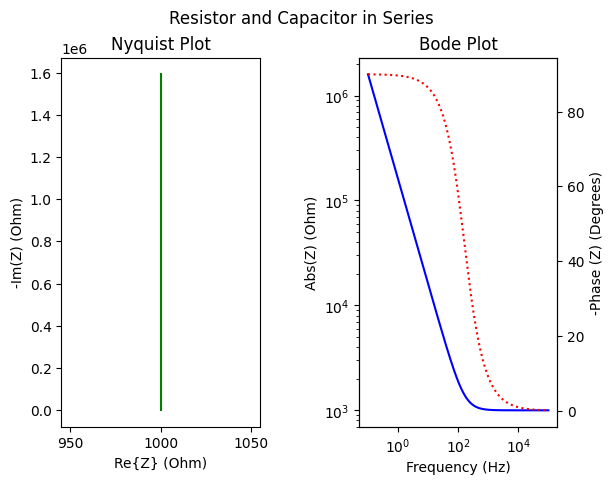

<Figure size 640x480 with 0 Axes>

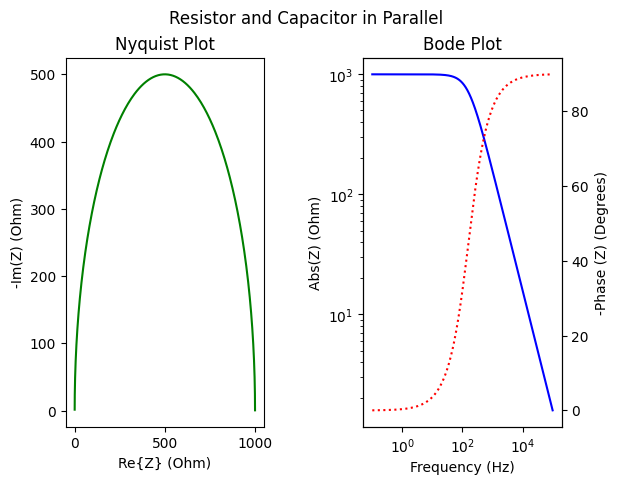

<Figure size 640x480 with 0 Axes>

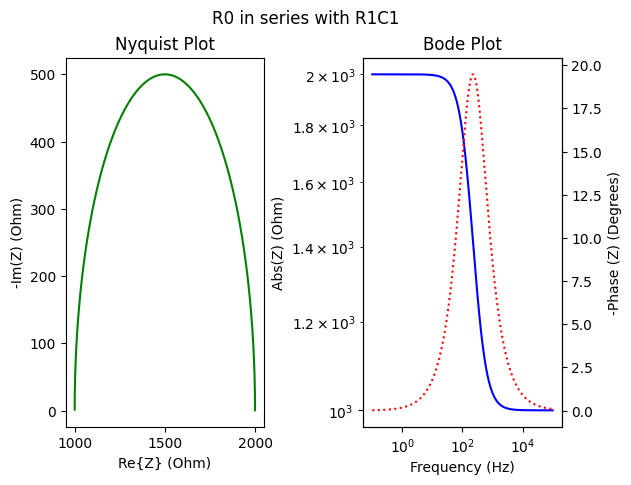

<Figure size 640x480 with 0 Axes>

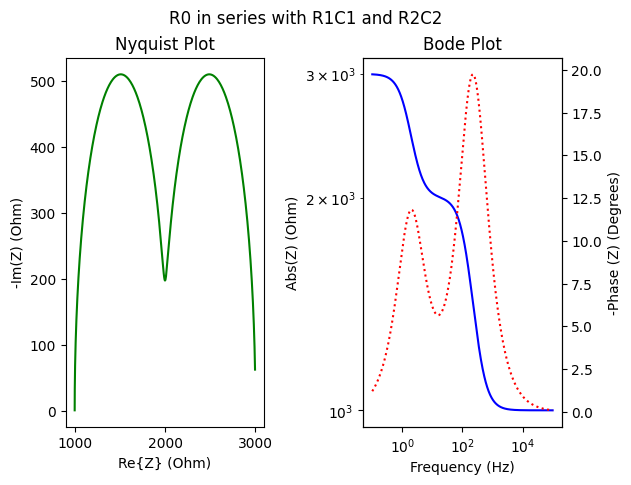

In [20]:

# Simulate a resistor and capacitor in series

R1 = 1000
C1 = 1.0e-6
ZRCseries = R1 +  1/(jw*C1)
drawZplots(ZRCseries,"Resistor and Capacitor in Series")

# Simulate a resistor and capacitor in parallel

R1 = 1000
C1 = 1.0e-6
ZRCparallel = R1/(1 + jw*R1*C1)
drawZplots(ZRCparallel,"Resistor and Capacitor in Parallel")

# Simulate a resistor R0 in series with a parallel combination of R1,C1

R0 = 1000
R1 = 1000
C1 = 1.0e-6
ZR0_R1C1 = R0 + R1/(1 + jw*R1*C1)
drawZplots(ZR0_R1C1,"R0 in series with R1C1")

# Simulate a resistor R0 in series with a parallel combination of R1,C1
# followed by another parallel combination of R2,C2

R0 = 1000
R1 = 1000
R2 = 1000
C1 = 1.0e-6
C2 = 1.0e-4
ZR0_R1C1_R2C2 = R0 + R1/(1 + jw*R1*C1) + R2/(1 + jw*R2*C2)
drawZplots(ZR0_R1C1_R2C2,"R0 in series with R1C1 and R2C2")

<Figure size 640x480 with 0 Axes>

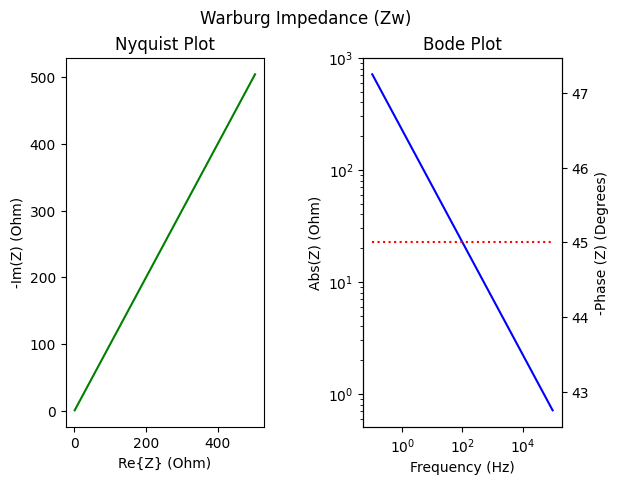

<Figure size 640x480 with 0 Axes>

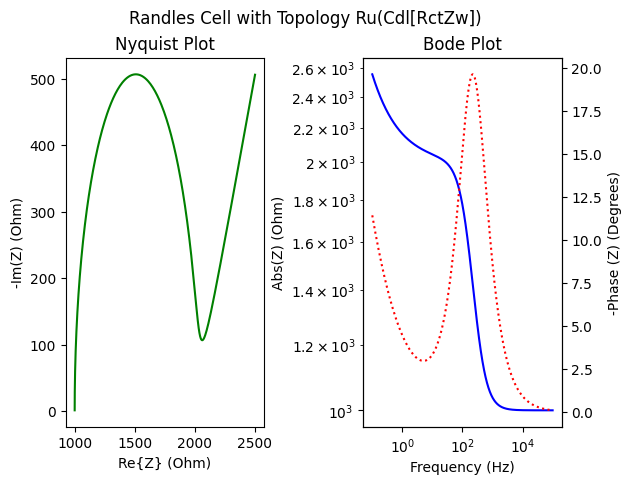

<Figure size 640x480 with 0 Axes>

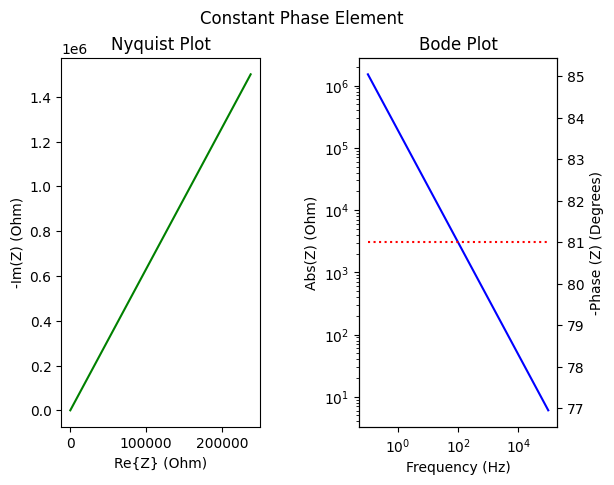

TypeError: drawZplots() takes 2 positional arguments but 3 were given

In [27]:
# Simulate a Warburg impedance on its own
Sigma = 400
ZWar = Sigma*on_sqrt_w*(1 - 1j)
drawZplots(ZWar,"Warburg Impedance (Zw)")

# Simulate a Randles cell containing a Warburg impedance
# The cell consists of a resistance Rct in series with a Warburg impeance Zw
# all in parallel with a capacitor Cdl and all of this is series with a
# resistance Ru. The cell notation is Ru(Cdl[RctZw]).

Ru = 1000
Rct = 1000
Cdl = 1e-6
Sigma = 400
ZWar = Sigma*on_sqrt_w*(1 - 1j)
ZRctZWar = Rct + ZWar
ZCdl = 0 +  1/(jw*Cdl)
ZRand = Ru + (ZCdl*ZRctZWar)/(ZCdl + ZRctZWar)
#drawZplots(ZRand,"Randles Cell with Topology Ru(Cdl[RctZw])")
drawZplots(ZRand,"Randles Cell with Topology Ru(Cdl[RctZw])")


# Simulate a Constant Phase Element on its own

Alpha = 0.9
Q = 1.0e-6
ZCPE = 1/(Q*(jw**Alpha))
drawZplots(ZCPE,"Constant Phase Element")

# Simulate a resistor Ru in series with a Constant Phase Element Q1

Ru = 1000
Q1 = 1.0e-6
Alpha1 = 0.9
ZCPE1 = 1/(Q1*(jw**Alpha1))
ZRuZCPE1 = Ru + ZCPE1
drawZplots(ZRuZCPE1,"Resistor in Series with Constant Phase Element",'Nyquist')

# Simulate a resistor Ru in series with a parallel combination of resistor
# Rct and Constant Phase Element Q1

Ru = 1000
Rct = 1000
Q1 = 2.0e-6
Alpha1 = 0.9
ZCPE1 = 1/(Q1*(jw**Alpha1))
ZRu_RctCPE1 = Ru + Rct*ZCPE1/(Rct + ZCPE1)
drawZplots(ZRu_RctCPE1,"Randles Cell with Topology Ru(RctCPE)",'Bode')


<Figure size 640x480 with 0 Axes>

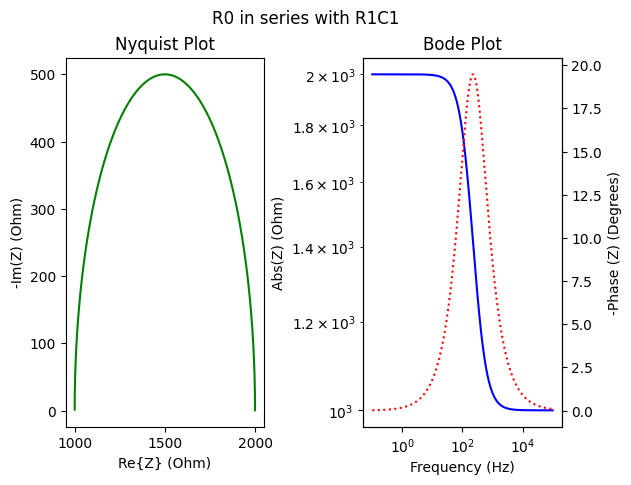

<Figure size 640x480 with 0 Axes>

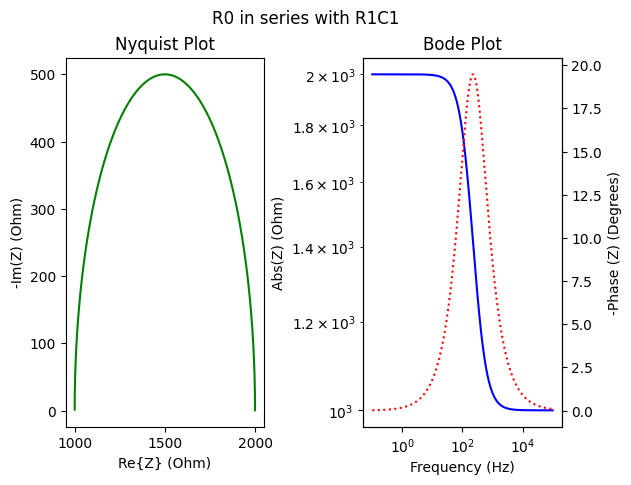

In [25]:
# Simulate a resistor R0 in series with a parallel combination of R1,C1

R0 = 1000
R1 = 1000
C1 = 1.0e-6
ZR0_R1C1 = R0 + R1/(1 + jw*R1*C1)
drawZplots(ZR0_R1C1,"R0 in series with R1C1")
drawZplots(ZR0_R1C1,"R0 in series with R1C1")

<Figure size 640x480 with 0 Axes>

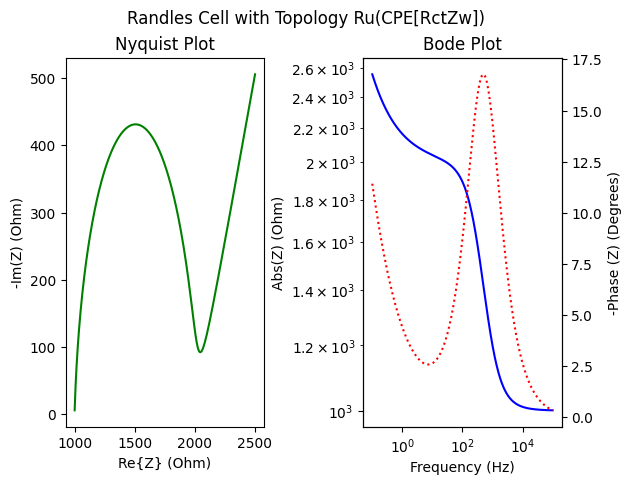

In [28]:
Zcell = Ru + (ZCPE*ZRctZWar)/(ZCPE+ZRctZWar)
drawZplots(Zcell,"Randles Cell with Topology Ru(CPE[RctZw])")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def drawZplots(Zarray, Freq, PlotTitle):
    """
    This function draws both a Nyquist and a Bode plot from the impedance data
    in Zarray, with a title in PlotTitle. It uses the frequency array Freq for the Bode plot.
    """

    # Create a figure and a set of subplots: 1 row, 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Nyquist plot on the first subplot
    axs[0].plot(np.real(Zarray), -np.imag(Zarray), color='green')
    axs[0].set_xlabel("Re{Z} (Ohm)")
    axs[0].set_ylabel("-Im{Z} (Ohm)")
    axs[0].set_title(f"{PlotTitle} - Nyquist Plot")

    # Bode plot for magnitude on the second subplot, shared X-axis for phase
    axs[1].plot(Freq, np.abs(Zarray), color='blue', label='Magnitude')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Abs(Z) (Ohm)")
    axs[1].set_title(f"{PlotTitle} - Bode Plot")

    # Creating a secondary y-axis for phase on the same subplot as magnitude
    ax2 = axs[1].twinx()
    ax2.plot(Freq, np.rad2deg(np.angle(Zarray)), color='red', linestyle='dotted', label='Phase')
    ax2.set_ylabel("Phase (Z) (Degrees)")

    # Adjust layout for readability
    fig.tight_layout()

    # Display the plots
    plt.show()

# Frequency setup remains the same
Fstart = 0.1  # Lowest frequency in Hz
Fstop = 1e5  # Highest frequency in Hz
Nfreq = 1001  # Number of frequencies

Ftemp = np.linspace(np.log10(Fstart), np.log10(Fstop), Nfreq)
Freq = 10**Ftemp
w = 2 * np.pi * Freq
jw = 1j * w

# Impedance calculations for a resistor, capacitor, and inductor
R1 = 1000
ZRes = R1 + 0*jw

C1 = 1.0e-6
ZCap = 1/(jw*C1)

L1 = 2.5
ZInd = jw*L1

# Example usage to plot for the resistor
drawZplots(ZRes, Freq, "Resistor")
drawZplots(ZCap, Freq, "Capacitor")
drawZplots(ZInd, Freq, "Inductor")
# For capacitor and inductor, just call the function with `ZCap` and `ZInd` respectively.
# e.g., drawZplots(ZCap, Freq, "Capacitor")
#      drawZplots(ZInd, Freq, "Inductor")
